In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv("income.csv")

In [9]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [10]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

In [11]:
df.values

array([['Rob', 27, 70000],
       ['Michael', 29, 90000],
       ['Mohan', 29, 61000],
       ['Ismail', 28, 60000],
       ['Kory', 42, 150000],
       ['Gautam', 39, 155000],
       ['David', 41, 160000],
       ['Andrea', 38, 162000],
       ['Brad', 36, 156000],
       ['Angelina', 35, 130000],
       ['Donald', 37, 137000],
       ['Tom', 26, 45000],
       ['Arnold', 27, 48000],
       ['Jared', 28, 51000],
       ['Stark', 29, 49500],
       ['Ranbir', 32, 53000],
       ['Dipika', 40, 65000],
       ['Priyanka', 41, 63000],
       ['Nick', 43, 64000],
       ['Alia', 39, 80000],
       ['Sid', 41, 82000],
       ['Abdul', 39, 58000]], dtype=object)

In [12]:
%matplotlib inline

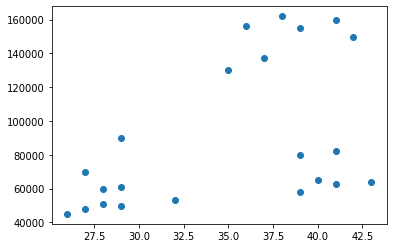

In [14]:
plt.scatter(df["Age"],df["Income($)"])

In [15]:
kmeans = KMeans(n_clusters=3)

In [16]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
y_predicted = kmeans.fit_predict(df[["Age","Income($)"]])

In [19]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [20]:
df["cluster"] = y_predicted

In [21]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [22]:
df1 = df[df.cluster == 0]

In [23]:
df1

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
19,Alia,39,80000,0
20,Sid,41,82000,0


In [24]:
df2 = df[df.cluster == 1]

In [25]:
df2

,Name,Age,Income($),cluster
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1
10,Donald,37,137000,1


In [26]:
df3 = df[df.cluster == 2]

In [27]:
df3

,Name,Age,Income($),cluster
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2
14,Stark,29,49500,2
15,Ranbir,32,53000,2
16,Dipika,40,65000,2
17,Priyanka,41,63000,2
18,Nick,43,64000,2


Text(0, 0.5, 'Income($)')

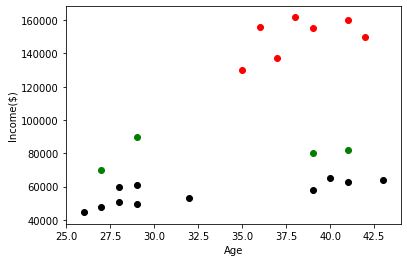

In [33]:
plt.scatter(df1["Age"],df1["Income($)"],color="green")
plt.scatter(df2["Age"],df2["Income($)"],color="red")
plt.scatter(df3["Age"],df3["Income($)"],color="black")
plt.xlabel("Age")
plt.ylabel("Income($)")

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [39]:
df["Age"] = scaler.fit_transform(df[["Age"]])

In [40]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,70000,0
1,Michael,0.176471,90000,0
2,Mohan,0.176471,61000,2
3,Ismail,0.117647,60000,2
4,Kory,0.941176,150000,1
5,Gautam,0.764706,155000,1
6,David,0.882353,160000,1
7,Andrea,0.705882,162000,1
8,Brad,0.588235,156000,1
9,Angelina,0.529412,130000,1


In [41]:
df["Income($)"] = scaler.fit_transform(df[["Income($)"]])

In [42]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [44]:
y_predicted = kmeans.fit_predict(df[["Age","Income($)"]])

In [45]:
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [46]:
df["cluster"] = y_predicted

In [47]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


Text(0, 0.5, 'Income($)')

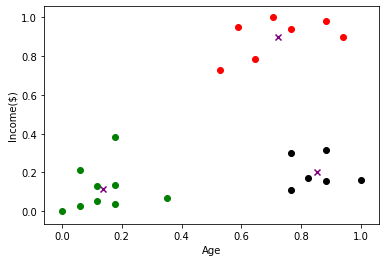

In [51]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1["Age"],df1["Income($)"],color="green")
plt.scatter(df2["Age"],df2["Income($)"],color="red")
plt.scatter(df3["Age"],df3["Income($)"],color="black")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="purple", marker="x")
plt.xlabel("Age")
plt.ylabel("Income($)")

In [53]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
k_range = range(1,10)
jTheta = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[["Age","Income($)"]])
    jTheta.append(kmeans.inertia)

AttributeError: 'KMeans' object has no attribute 'inertia'